In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import math

In [24]:
dataset = pd.read_csv('First Iteration Data\dataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12620 entries, 0 to 12619
Data columns (total 19 columns):
tag_header                 12620 non-null object
tag_para                   12620 non-null object
tag_formatting             12620 non-null object
word_count                 12620 non-null int64
interacting_span_tag       12620 non-null object
relative_x_coord           12620 non-null float64
relative_y_coord           12620 non-null float64
relative_listings          12620 non-null float64
relative_hyperlinks        12620 non-null float64
tag_img                    12620 non-null object
src_img_interaction        12620 non-null object
red_flag_class             12620 non-null object
tag_table                  12620 non-null object
tag_sup                    12620 non-null object
tag_sup_child              12620 non-null object
red_flag_id                12620 non-null object
relative_table_elements    12620 non-null float64
height_width_diff          12620 non-null float64
labe

In [3]:
zero_listings = [dataset['relative_listings'][i] for i in range(dataset['relative_listings'].shape[0]) if not math.isnan(dataset['relative_listings'][i]) and dataset['label'][i] == 0]

In [4]:
one_listings = [dataset['relative_listings'][i] for i in range(dataset['relative_listings'].shape[0]) if not math.isnan(dataset['relative_listings'][i]) and dataset['label'][i] == 1]

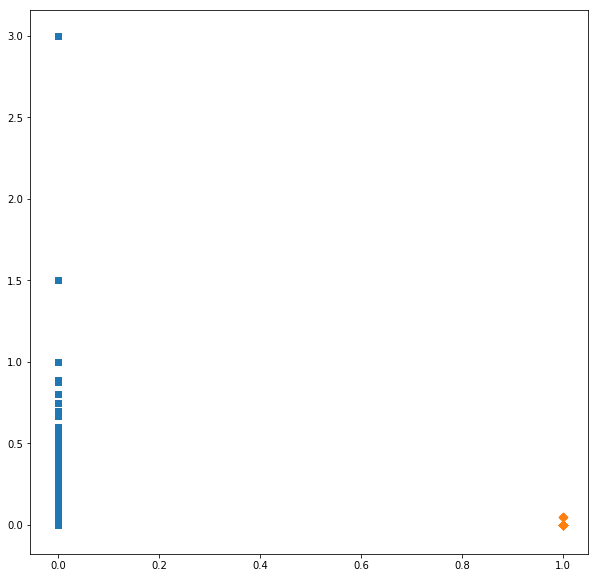

In [5]:
plt.figure(figsize = (10, 10))
plt.scatter(list(np.zeros(len(zero_listings))), zero_listings, marker = 's')
plt.scatter(list(np.ones(len(one_listings))), one_listings, marker = 'D')
plt.show()

In [6]:
zero_hypers = [dataset['relative_hyperlinks'][i] for i in range(dataset['relative_hyperlinks'].shape[0]) if not math.isnan(dataset['relative_hyperlinks'][i]) and dataset['label'][i] == 0]

In [7]:
one_hypers = [dataset['relative_hyperlinks'][i] for i in range(dataset['relative_hyperlinks'].shape[0]) if not math.isnan(dataset['relative_hyperlinks'][i]) and dataset['label'][i] == 1]

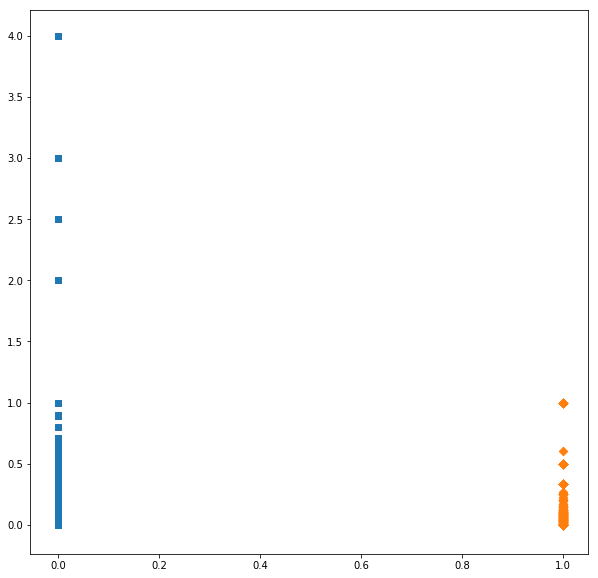

In [8]:
plt.figure(figsize = (10,10))
plt.scatter(list(np.zeros(len(zero_hypers))), zero_hypers, marker = 's')
plt.scatter(list(np.ones(len(one_hypers))), one_hypers, marker = 'D')
plt.show()

In [9]:
zero_tab_elems = [dataset['relative_table_elements'][i] for i in range(dataset['relative_table_elements'].shape[0]) if not math.isnan(dataset['relative_table_elements'][i]) and dataset['label'][i] == 0]

In [10]:
one_tab_elems = [dataset['relative_table_elements'][i] for i in range(dataset['relative_table_elements'].shape[0]) if not math.isnan(dataset['relative_table_elements'][i]) and dataset['label'][i] == 1]

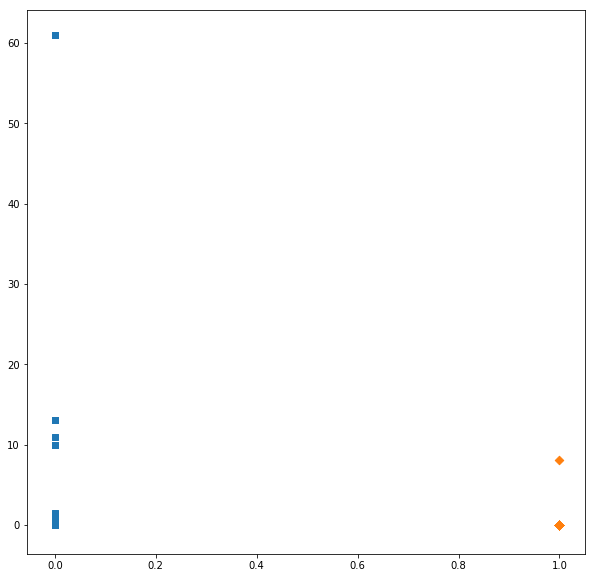

In [11]:
plt.figure(figsize = (10,10))
plt.scatter(list(np.zeros(len(zero_tab_elems))), zero_tab_elems, marker = 's')
plt.scatter(list(np.ones(len(one_tab_elems))), one_tab_elems, marker = 'D')
plt.show()

In [41]:
max(one_tab_elems)

0.023494166

In [22]:
dataset.head()

,tag_header,tag_para,tag_formatting,word_count,interacting_span_tag,relative_x_coord,relative_y_coord,relative_listings,relative_hyperlinks,tag_img,src_img_interaction,red_flag_class,tag_table,tag_sup,tag_sup_child,red_flag_id,relative_table_elements,height_width_diff,label
0,NO,NO,NO,0,NO,0.184336,0.003151,10.0,10.0,NO,NO,NO,NO,NO,NO,NO,100.0,17.600006,0
1,NO,NO,NO,0,NO,0.184336,0.003707,10.0,10.0,NO,NO,NO,NO,NO,NO,NO,100.0,-1041.599976,0
2,NO,NO,NO,0,NO,1.100514,0.003707,10.0,10.0,NO,NO,NO,NO,NO,NO,NO,100.0,-14.883331,0
3,NO,NO,NO,0,NO,1.100514,0.003893,10.0,10.0,NO,NO,NO,NO,NO,NO,NO,100.0,3.400009,0
4,NO,NO,NO,0,NO,1.100514,0.004041,10.0,10.0,NO,NO,NO,NO,NO,NO,NO,100.0,-3.000000,0


In [12]:
x_zero = [dataset['relative_x_coord'][i] for i in range(dataset['relative_x_coord'].shape[0]) if not math.isnan(dataset['relative_x_coord'][i]) and dataset['label'][i] == 0]
x_one = [dataset['relative_x_coord'][i] for i in range(dataset['relative_x_coord'].shape[0]) if not math.isnan(dataset['relative_x_coord'][i]) and dataset['label'][i] == 1]
y_zero = [dataset['relative_y_coord'][i] for i in range(dataset['relative_y_coord'].shape[0]) if not math.isnan(dataset['relative_y_coord'][i]) and dataset['label'][i] == 0]
y_one = [dataset['relative_y_coord'][i] for i in range(dataset['relative_y_coord'].shape[0]) if not math.isnan(dataset['relative_y_coord'][i]) and dataset['label'][i] == 1]
diff_zero = [dataset['height_width_diff'][i] for i in range(dataset['height_width_diff'].shape[0]) if not math.isnan(dataset['height_width_diff'][i]) and dataset['label'][i] == 0]
diff_one = [dataset['height_width_diff'][i] for i in range(dataset['height_width_diff'].shape[0]) if not math.isnan(dataset['height_width_diff'][i]) and dataset['label'][i] == 1]

Text(0.5,0,'relative_y')

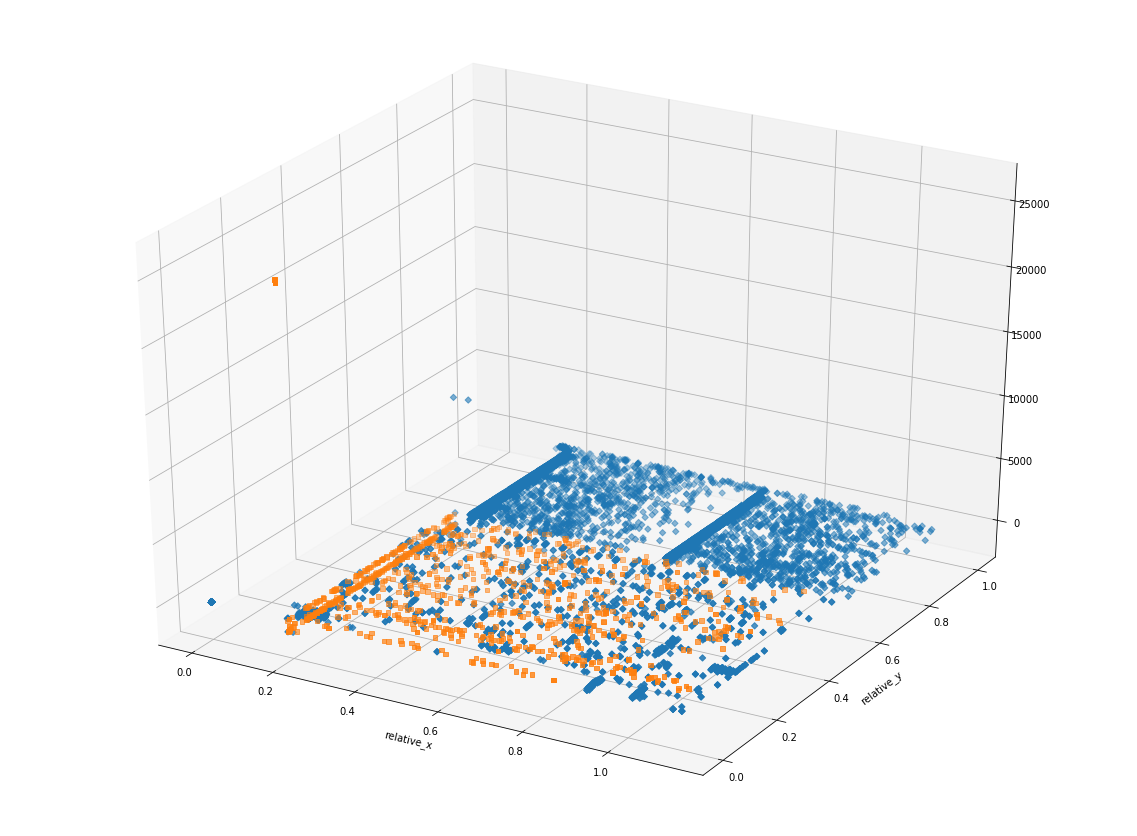

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_zero, y_zero,diff_zero, marker = 'D')
ax.scatter(x_one, y_one,diff_one, marker = 's')
ax.set_xlabel('relative_x')
ax.set_ylabel('relative_y')
# ax.set_zlabel('relative_z')

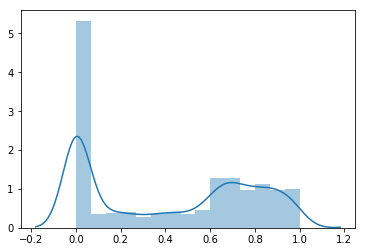

In [38]:
sns.distplot([a for a in dataset.relative_y_coord if not math.isnan(a)])

In [19]:
dataset.label.value_counts()

0    10402
1      998
Name: label, dtype: int64

In [25]:
dataset.label.value_counts()

0    11492
1     1128
Name: label, dtype: int64

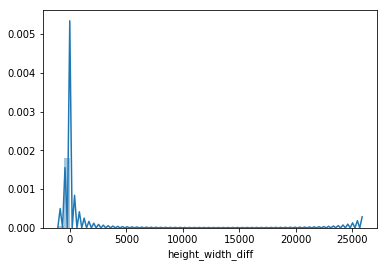

In [40]:
sns.distplot(dataset.height_width_diff)

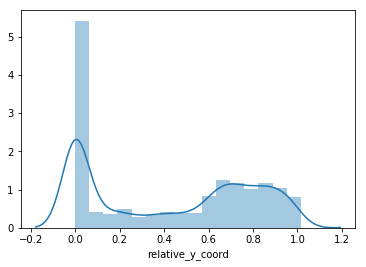

In [42]:
sns.distplot(dataset.relative_y_coord)

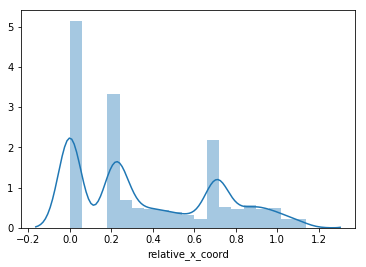

In [41]:
sns.distplot(dataset.relative_x_coord)